In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras import layers
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('number of images', x_train.shape[0])
print("number of labels:", len(y_train))
print('size of the test arrays:', x_test.shape[0])

number of images 60000
number of labels: 60000
size of the test arrays: 10000


In [7]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Output 10 images

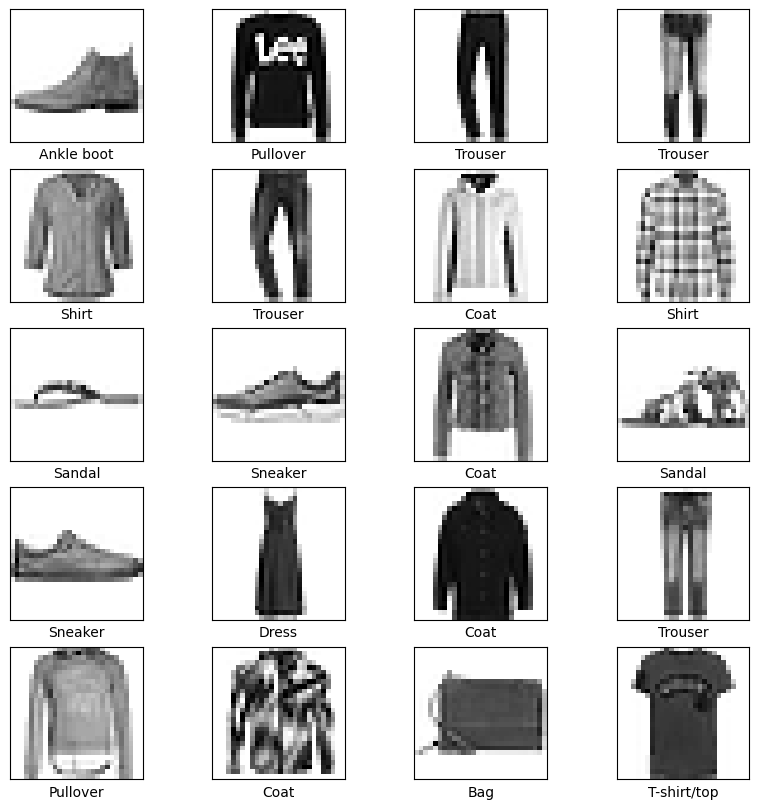

In [10]:
plt.figure(figsize=(10,10))

for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
plt.show()

Creating CNNs (Convolutional neural networks)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

def CNNs_model(learning_rate, epochs, batch_size):
    model = Sequential([
        layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),        
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Dropout(0.10),

        layers.Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Dropout(0.20),

        layers.Conv2D(128, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Dropout(0.30),
        
        layers.Conv2D(256, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Conv2D(256, (3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Dropout(0.40),
        
        layers.Flatten(),
        layers.Dense(1024, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    early_stopping = EarlyStopping(
        monitor="val_loss",
        patience=10,
        verbose=1,
        restore_best_weights=True)
    
    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=[early_stopping])

    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')
    model.summary()
    
    return model, history

learning_rate = 0.001
epochs = 60
batch_size = 64
model, history_v1 = CNNs_model(learning_rate, epochs, batch_size)



c:\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 64ms/step - accuracy: 0.7061 - loss: 0.8267 - val_accuracy: 0.8566 - val_loss: 0.4037
Epoch 2/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.8585 - loss: 0.4121 - val_accuracy: 0.8787 - val_loss: 0.3337
Epoch 3/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.8807 - loss: 0.3454 - val_accuracy: 0.8941 - val_loss: 0.3137
Epoch 4/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.8903 - loss: 0.3141 - val_accuracy: 0.9030 - val_loss: 0.2737
Epoch 5/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.8992 - loss: 0.2873 - val_accuracy: 0.8978 - val_loss: 0.2957
Epoch 6/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.9057 - loss: 0.2678 - val_accuracy: 0.9070 - val_loss: 0.2635
Epoch 7/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.9111 - loss: 0.2571 - val_accuracy: 0.9031 - val_loss: 0.2799
Epoch 8/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.9149 - loss: 0.2397 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3, 3, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 1, 1, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 1, 1, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 1, 1, 256)      │       295,16

 Total params: 4,342,976 (16.57 MB)

 Trainable params: 1,447,018 (5.52 MB)

 Non-trainable params: 1,920 (7.50 KB)

 Optimizer params: 2,894,038 (11.04 MB)

In [16]:
from tensorflow.keras.models import load_model

# Model from last homework with the best accuracy
old_model = load_model(r'fashion_mnist_dense.h5')
old_model.summary()

# Last model with the best accuracy from last homework
def fashion_mnist_model_v2(epochs=20, batch_size=32):
    model = Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax'),
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')

    return history
history_v2 = fashion_mnist_model_v2()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636,012 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Epoch 1/20


c:\Python\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7721 - loss: 0.6528 - val_accuracy: 0.8530 - val_loss: 0.4116
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8378 - loss: 0.4463 - val_accuracy: 0.8520 - val_loss: 0.4003
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8498 - loss: 0.4167 - val_accuracy: 0.8443 - val_loss: 0.4290
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8550 - loss: 0.3992 - val_accuracy: 0.8451 - val_loss: 0.4167
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8661 - loss: 0.3767 - val_accuracy: 0.8667 - val_loss: 0.3633
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8654 - loss: 0.3709 - val_accuracy: 0.8760 - val_loss: 0.3499
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8687 - loss: 0.3563 - val_accuracy: 0.8758 - val_loss: 0.3433
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8719 - loss: 0.3486 - val_accurac

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


<Figure size 3000x300 with 0 Axes>

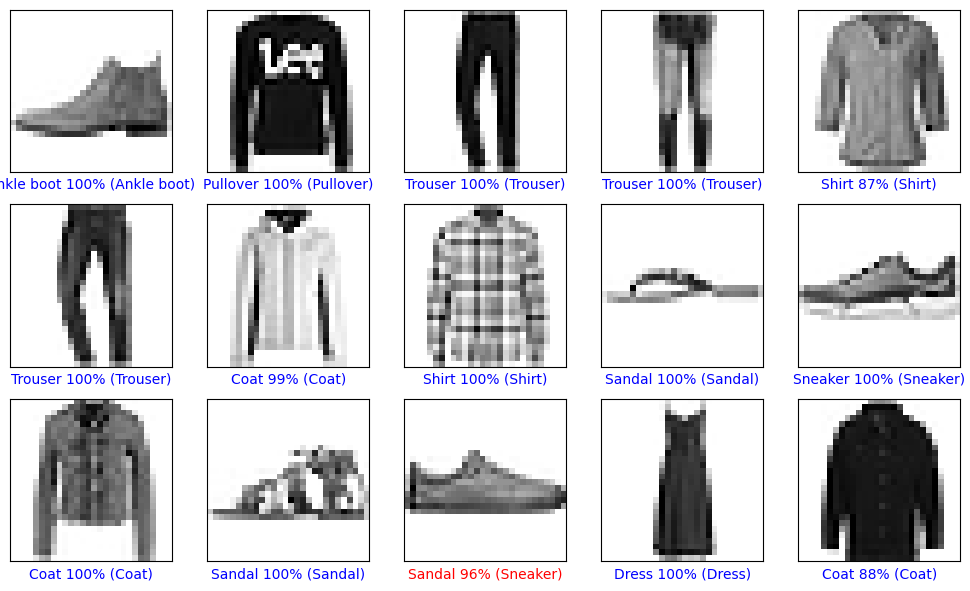

In [17]:
import matplotlib.pyplot as plt

# Predictions by CNNs
predictions = model.predict(x_test)

def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

    
num_images = 15
num_rows = 3  
num_cols = 5  
plt.figure(figsize=(2*num_images, 3))

plt.figure(figsize=(2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)  
    plot_image(i, predictions[i], y_test[i], x_test[i])

plt.tight_layout() 
plt.show()   

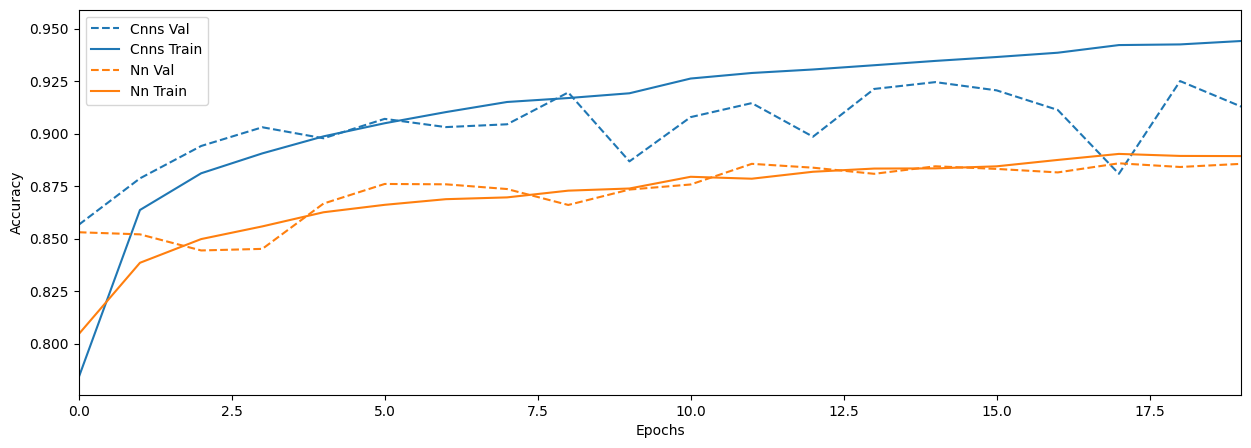

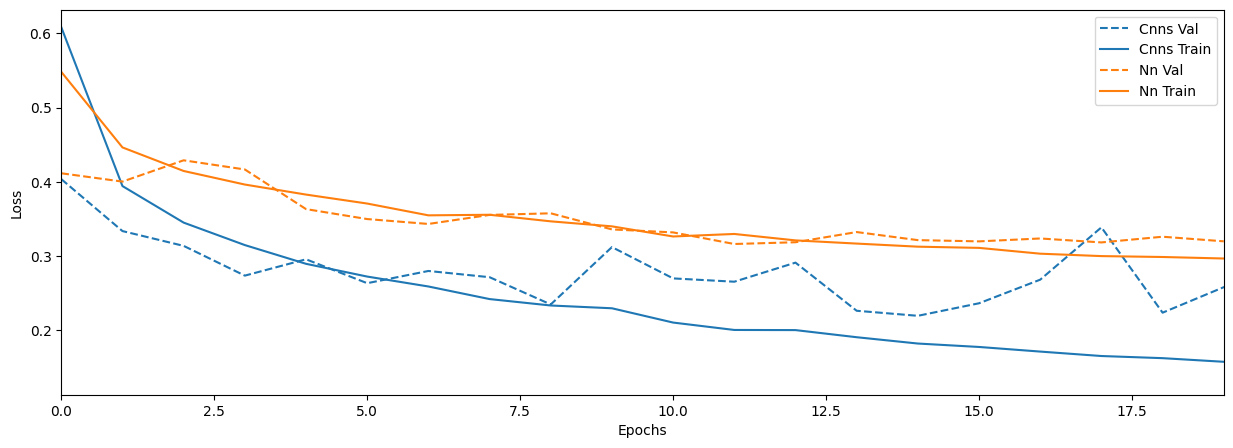

In [18]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(15, 5))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

    plt.xlim([0, max(history.epoch)])

plot_history([('CNNs', history_v1), ('NN', history_v2)], key='accuracy')
plot_history([('CNNs', history_v1), ('NN', history_v2)], key='loss')



Висновки:

CNNs модель показала не погані результати 92.07% accuracy, також вгадала 14 речей з 15 на другому графіку. В попередньому завдання для повнозєязної нейронної мережі вдалось досягти точності лише 87.98%. CNNs модель продемонструвала високу точність класифікації на тестовому наборі даних, що підтверджує її ефективність та потенціал для застосування в реальних умовах. Отже, згорткові нейронні мережі є більш ефективними для обробки зображень.
